# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Download and get Daily Returns
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)
goog = pd.read_csv('GOOG_CLOSE',index_col='Date',parse_dates=True)

In [28]:
stocks = pd.concat([aapl,cisco,ibm,amzn,goog],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn','goog']
stocks.head()

,aapl,cisco,ibm,amzn,goog
Date,,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03,NaN
2012-01-04,53.348386,16.057180,160.174781,177.51,NaN
2012-01-05,53.940658,15.997991,159.415086,177.61,NaN
2012-01-06,54.504543,15.938801,157.584912,182.61,NaN
2012-01-09,54.418089,16.040268,156.764786,178.56,NaN


In [31]:
mean_daily_ret = stocks.pct_change().mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
goog     0.000578
dtype: float64

In [32]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn,goog
aapl,1.000000,0.301990,0.297498,0.235487,0.388794
cisco,0.301990,1.000000,0.424672,0.284470,0.368189
ibm,0.297498,0.424672,1.000000,0.258492,0.384048
amzn,0.235487,0.284470,0.258492,1.000000,0.581999
goog,0.388794,0.368189,0.384048,0.581999,1.000000


# Simulating Thousands of Possible Allocations

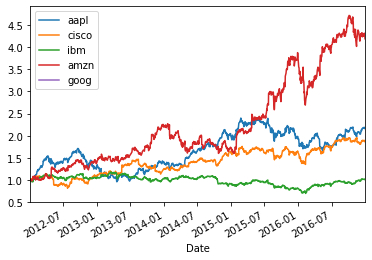

In [33]:
#Normalisation of prices
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [34]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn,goog
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490,NaN
2012-01-05,0.011102,-0.003686,-0.004743,0.000563,NaN
2012-01-06,0.010454,-0.003700,-0.011481,0.028152,NaN
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178,NaN


In [35]:
#Calculating Log returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn,goog
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526,NaN
2012-01-05,0.011041,-0.003693,-0.004754,0.000563,NaN
2012-01-06,0.010400,-0.003707,-0.011547,0.027763,NaN
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428,NaN


In [36]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
goog     0.116986
dtype: float64

In [37]:
# Compute pairwise covariance of columns
log_ret.cov()

,aapl,cisco,ibm,amzn,goog
aapl,0.000271,0.000071,0.000057,0.000075,0.000089
cisco,0.000071,0.000204,0.000072,0.000079,0.000074
ibm,0.000057,0.000072,0.000140,0.000059,0.000072
amzn,0.000075,0.000079,0.000059,0.000375,0.000175
goog,0.000089,0.000074,0.000072,0.000175,0.000225


In [38]:
log_ret.cov()*252 # multiply by days

,aapl,cisco,ibm,amzn,goog
aapl,0.068326,0.017854,0.014464,0.018986,0.022488
cisco,0.017854,0.051381,0.018029,0.019956,0.018728
ibm,0.014464,0.018029,0.035203,0.014939,0.018149
amzn,0.018986,0.019956,0.014939,0.094470,0.044140
goog,0.022488,0.018728,0.018149,0.044140,0.056741


## Single Run for Some Random Allocation

In [40]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(5))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn', 'goog'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698]


Rebalance to sum to 1.0
[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]


Expected Portfolio Return
0.14244007057951785


Expected Volatility
0.17925951396215298


Sharpe Ratio
0.7946025704922485


### Now we will run this 15000 times

In [41]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(5))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [49]:
sharpe_arr.max()

1.0169435361129862

In [50]:
sharpe_arr.argmax()

13416

In [51]:
all_weights[2490,:]

array([0.02771021, 0.30767754, 0.2203681 , 0.1654307 , 0.27881345])

In [52]:
max_sr_ret = ret_arr[13416]
max_sr_vol = vol_arr[13416]

## Plotting the data

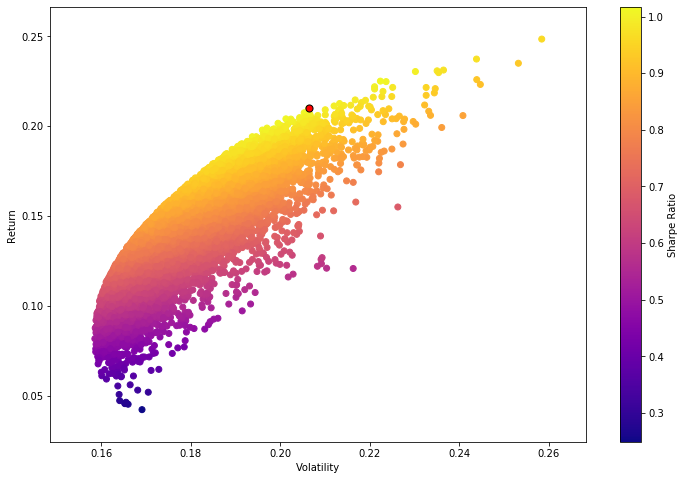

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')